## To predict whether a person will have diabetes or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes1.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Basic Checks

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## EDA

## Univariate Analysis

In [7]:
data.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [8]:
len(data.Pregnancies.unique())

17

In [9]:
len(data.loc[data.Glucose == 0])  #Ignore

5

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

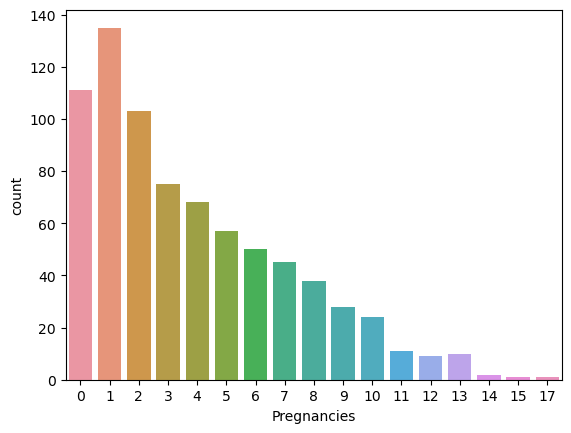

In [10]:
sns.countplot(x = data.Pregnancies)

# sns.countplot(x = data['Pregnancies'])

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

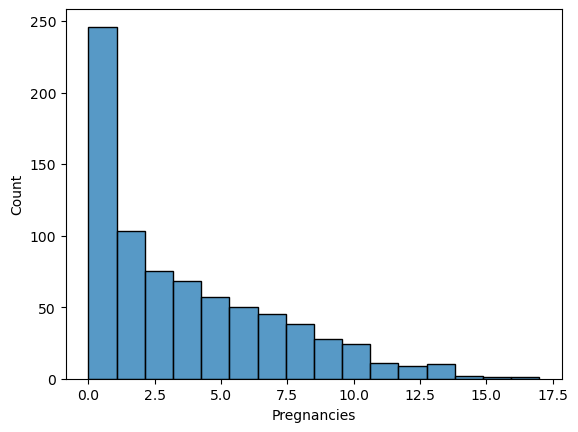

In [11]:
sns.histplot(x = data.Pregnancies)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

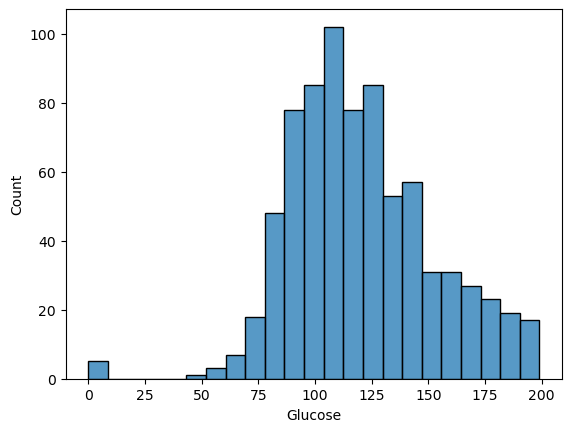

In [12]:
sns.histplot(x = data.Glucose)

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data1 = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
data1.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


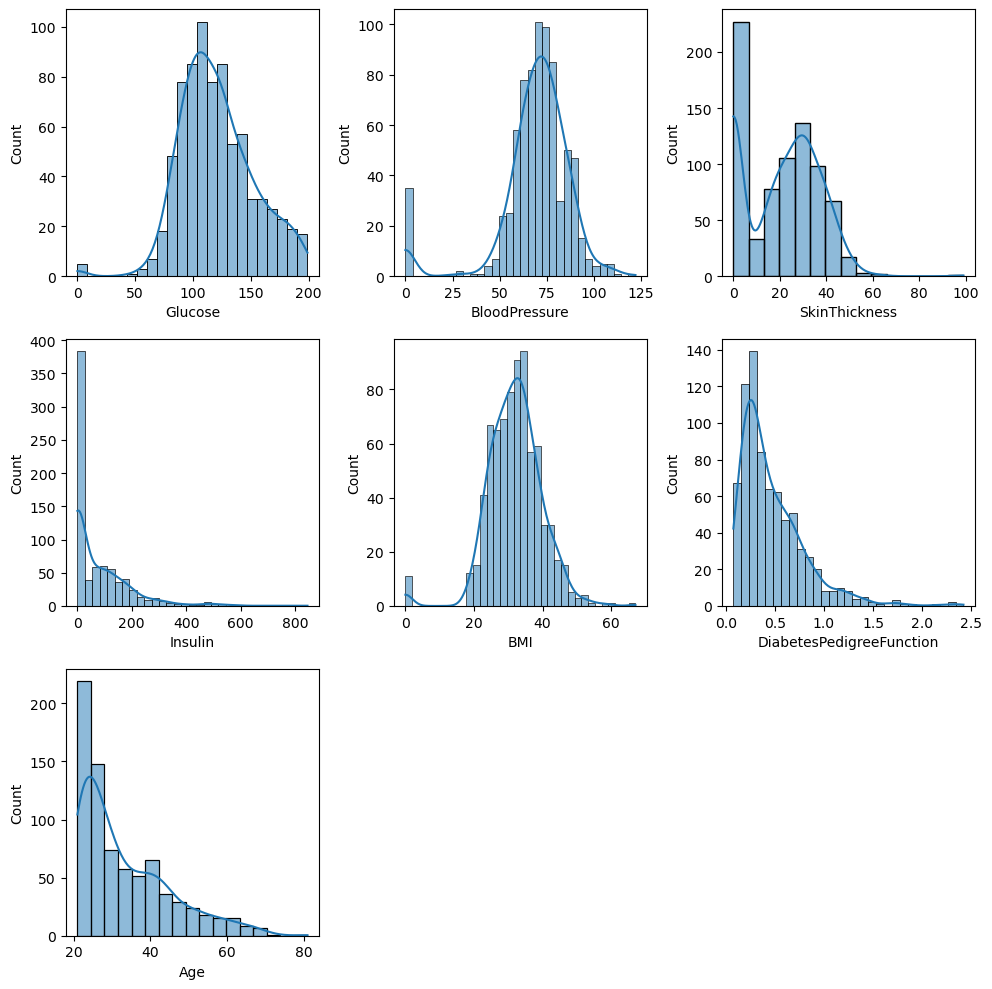

In [15]:
plt.figure(figsize = (10,10))
plotnumber = 1

for i in data1:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(x = data[i], kde = True)
    plotnumber = plotnumber + 1
plt.tight_layout()

In [16]:
# pip install sweetviz

In [17]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

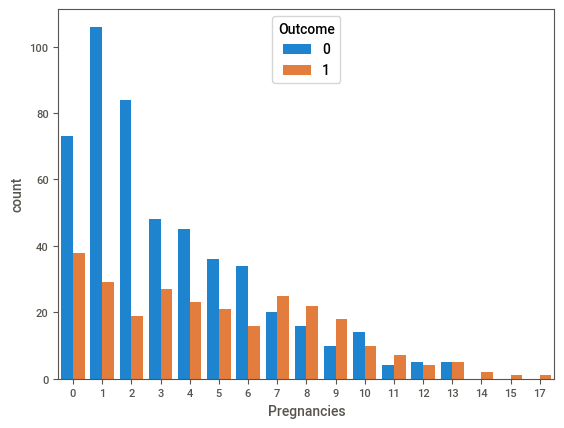

In [18]:
sns.countplot(x = data.Pregnancies, hue = data.Outcome)

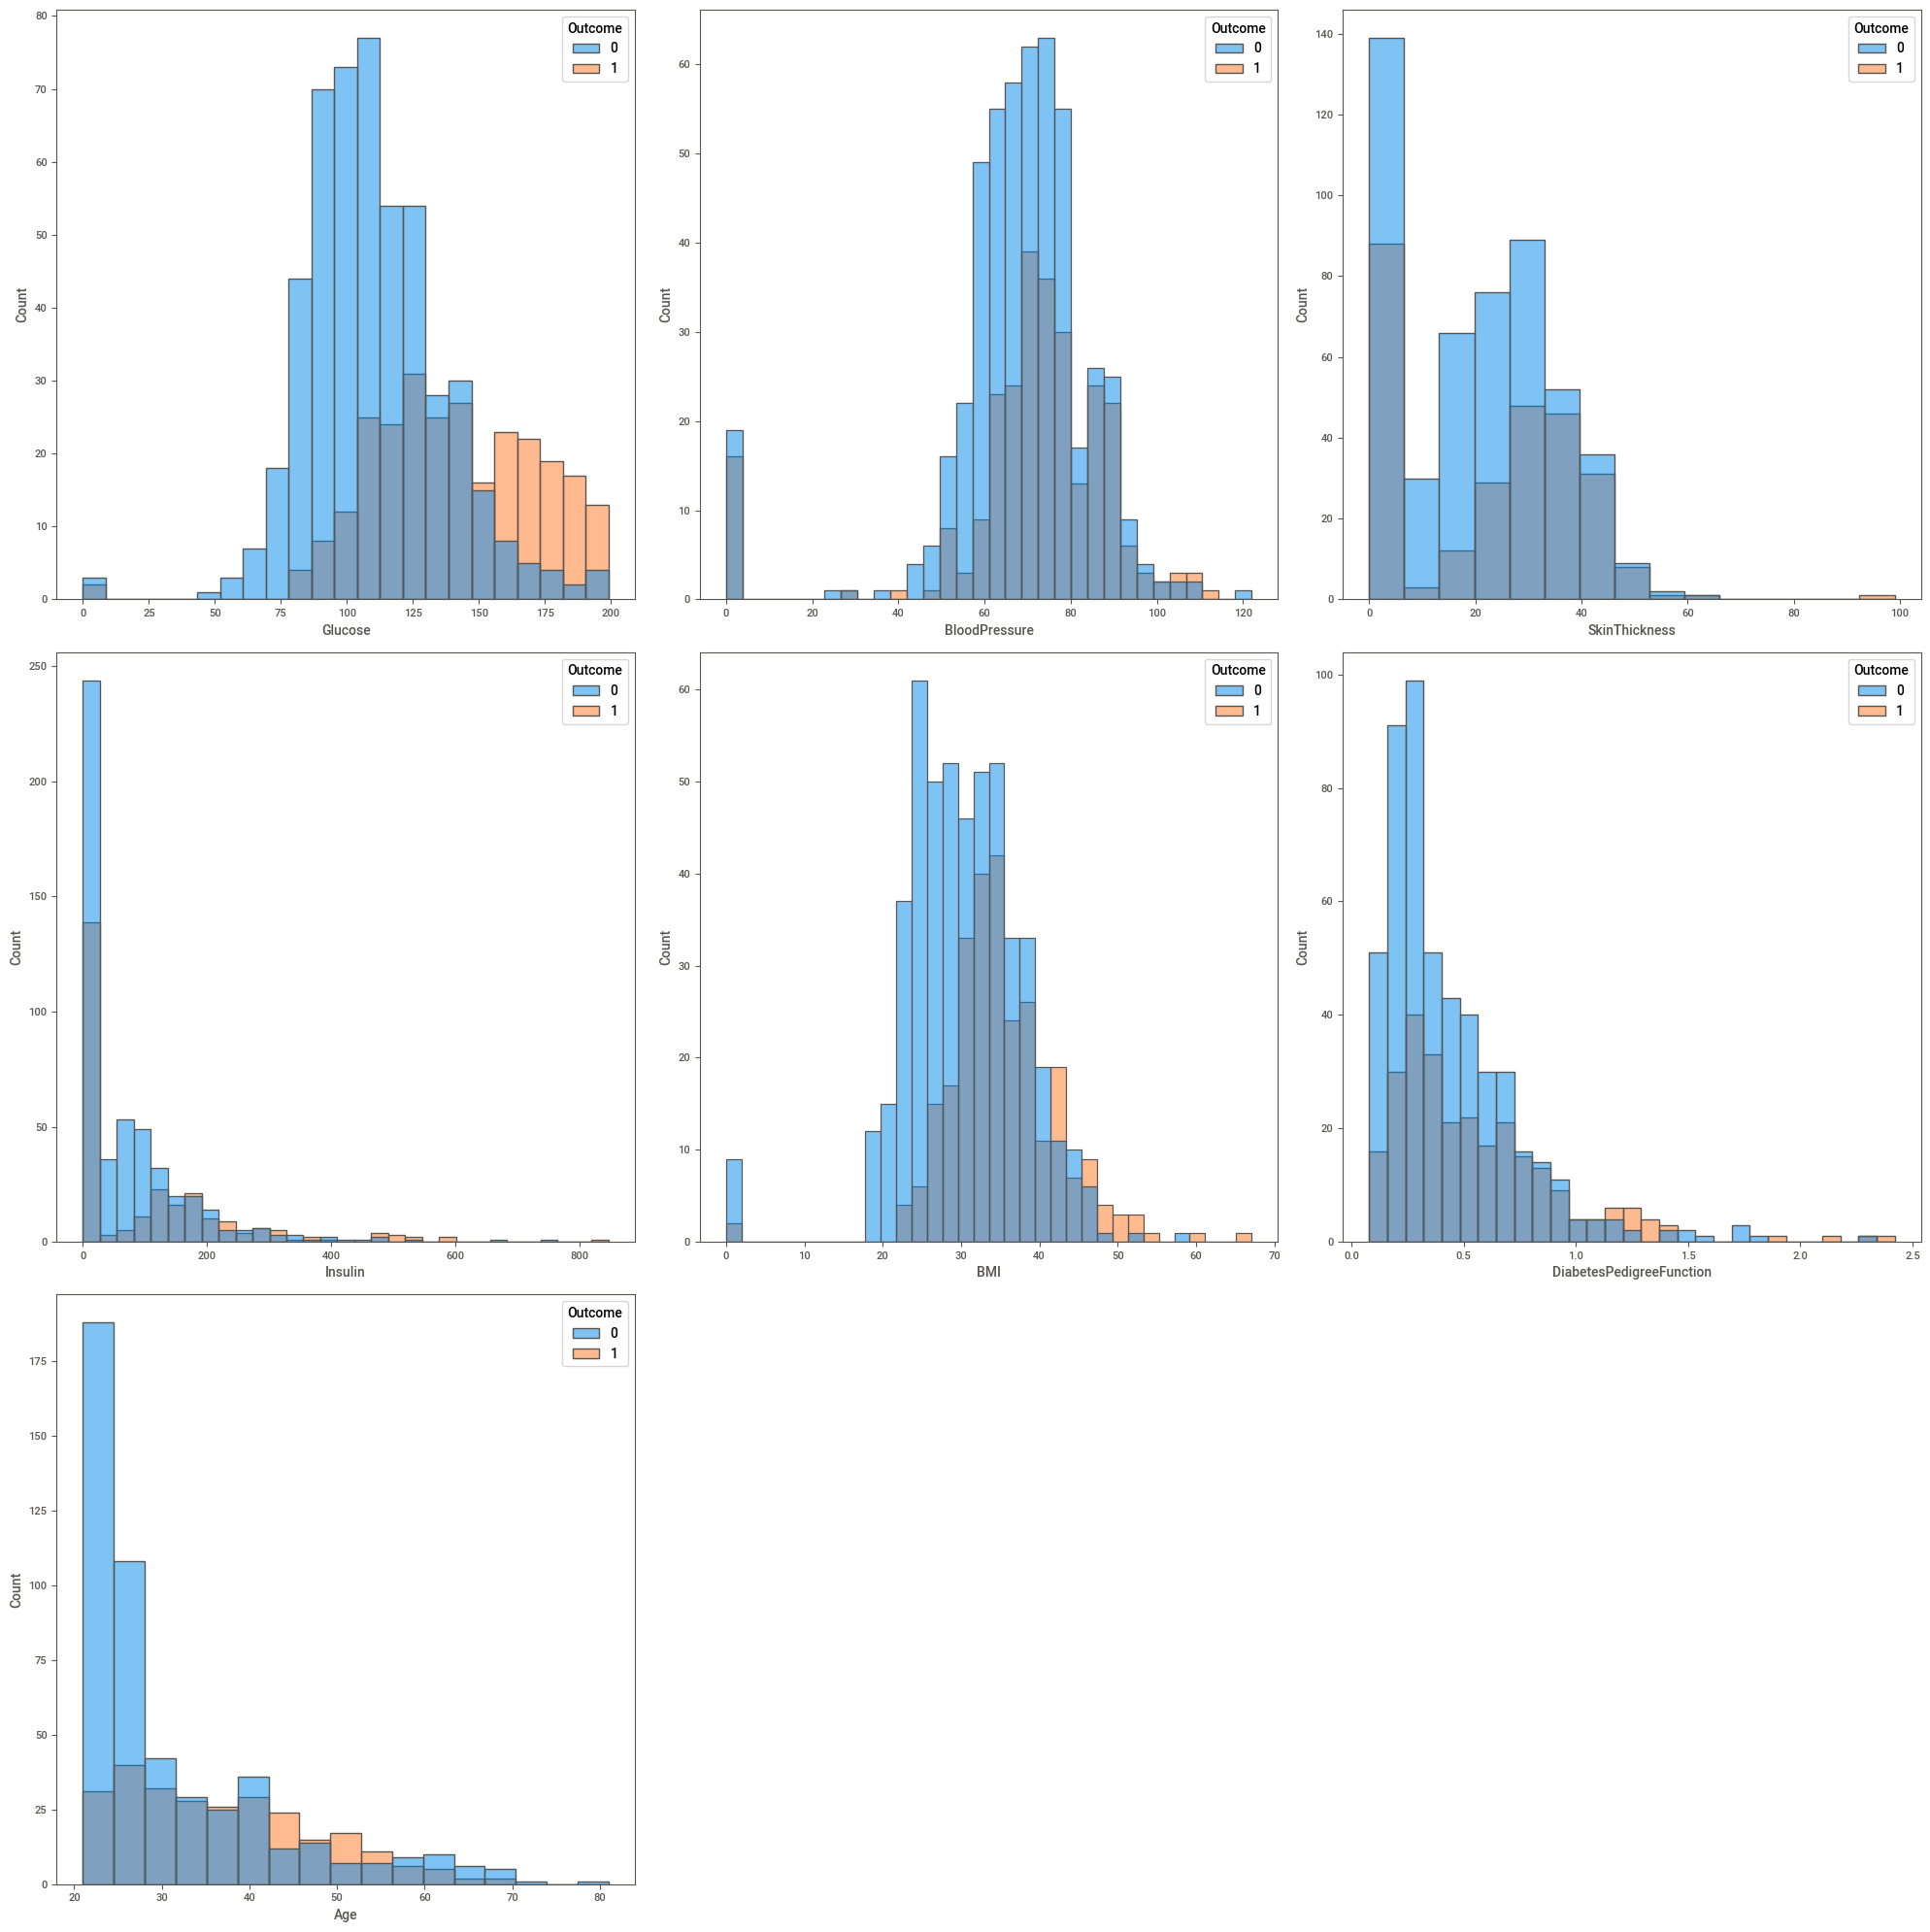

In [19]:
plt.figure(figsize = (20,20))
plotnumber = 1

for i in data1:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(x = data[i], hue = data.Outcome)
    plotnumber = plotnumber + 1
plt.tight_layout()

## Data Preprocessing

In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
data.loc[data.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [22]:
data.loc[data.Glucose == 0, 'Glucose']

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

In [23]:
np.median(data.Glucose)

117.0

In [23]:
data.loc[data.Glucose == 0, 'Glucose'] = np.median(data.Glucose)

In [24]:
data.loc[data.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [25]:
data.loc[data.BloodPressure == 0, 'BloodPressure'] = np.median(data.BloodPressure)

In [26]:
data.loc[data.BloodPressure == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [27]:
data.loc[data.SkinThickness == 0, 'SkinThickness'] = np.median(data.SkinThickness)
data.loc[data.Insulin == 0, 'Insulin'] = np.median(data.Insulin)
data.loc[data.BMI == 0, 'BMI'] = np.median(data.BMI)

Task : Handle Outliers

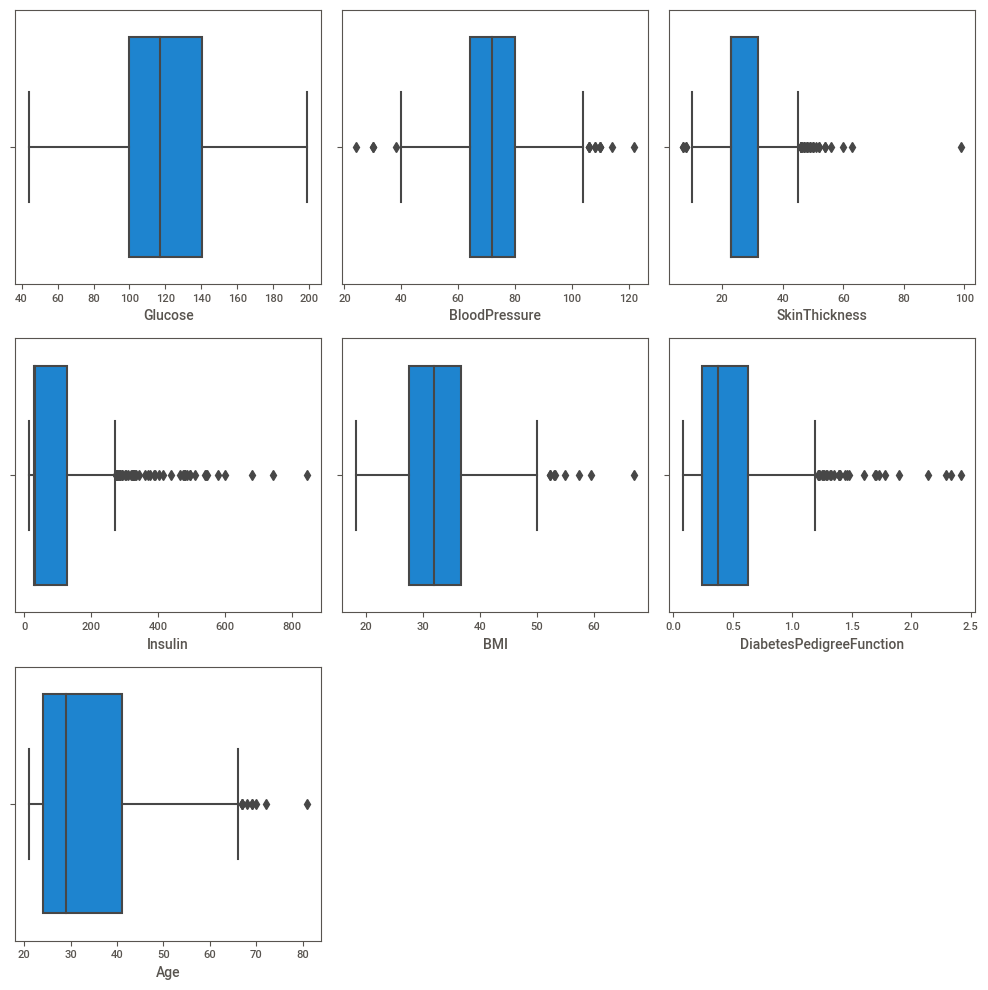

In [28]:
plt.figure(figsize = (10,10))
plotnumber = 1

for i in data1:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x = data[i])
    plotnumber = plotnumber +1
plt.tight_layout()

## Feature Selection

In [29]:
data.drop('Outcome', axis = 1).corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


<AxesSubplot:>

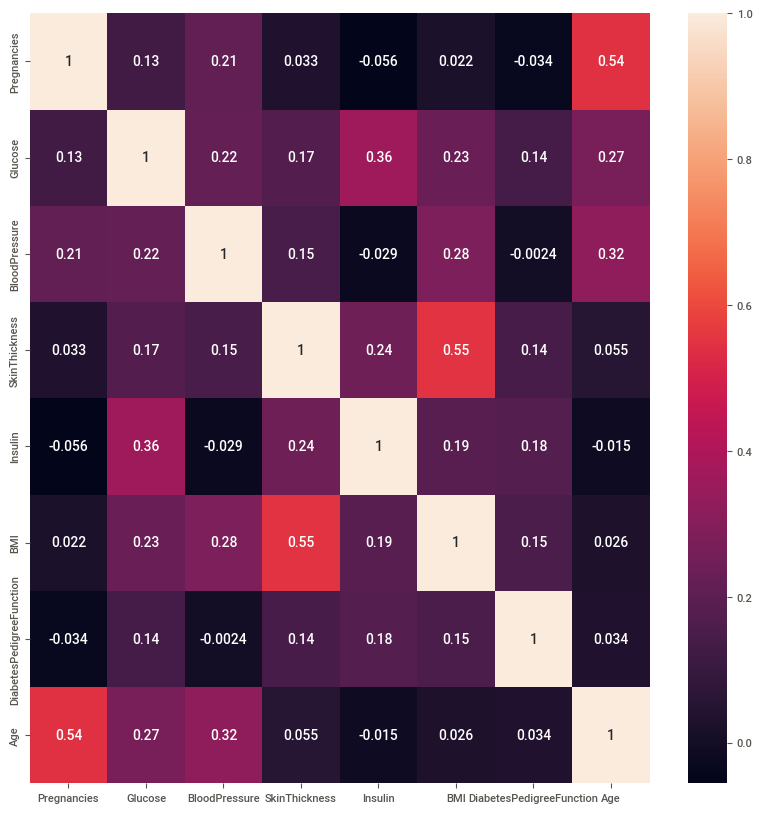

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(data.drop('Outcome', axis = 1).corr(), annot = True)

## Model Creation

In [31]:
x = data.drop('Outcome', axis = 1)
y = data.Outcome

In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [35]:
x_scaled

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [36]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [37]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [38]:
x1 = pd.DataFrame(data = x_scaled, columns = x.columns)
x1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 42)

In [40]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,0.764706,0.548387,0.489796,0.250000,0.019832,0.443763,0.209650,0.383333
73,0.235294,0.548387,0.632653,0.141304,0.307692,0.345603,0.065329,0.033333
352,0.176471,0.109677,0.591837,0.228261,0.019832,0.331288,0.070453,0.416667
497,0.117647,0.238710,0.489796,0.086957,0.074519,0.243354,0.200256,0.066667
145,0.000000,0.374194,0.520408,0.173913,0.019832,0.282209,0.210931,0.000000
...,...,...,...,...,...,...,...,...
71,0.294118,0.612903,0.408163,0.304348,0.151442,0.212679,0.142186,0.083333
106,0.058824,0.335484,1.000000,0.173913,0.019832,0.085890,0.055081,0.100000
270,0.588235,0.367742,0.632653,0.326087,0.019832,0.560327,0.451751,0.283333
435,0.000000,0.625806,0.489796,0.173913,0.019832,0.494888,0.054227,0.133333


In [41]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.352941,0.348387,0.346939,0.282609,0.211538,0.323108,0.150299,0.366667
324,0.117647,0.438710,0.520408,0.271739,0.019832,0.357873,0.029889,0.000000
624,0.117647,0.412903,0.408163,0.173913,0.019832,0.257669,0.034159,0.000000
690,0.470588,0.406452,0.571429,0.173913,0.019832,0.130879,0.332195,0.216667
473,0.411765,0.593548,0.673469,0.173913,0.019832,0.239264,0.056362,0.483333
...,...,...,...,...,...,...,...,...
554,0.058824,0.258065,0.408163,0.173913,0.121394,0.382413,0.167805,0.116667
319,0.352941,0.967742,0.551020,0.173913,0.019832,0.108384,0.021776,0.633333
594,0.352941,0.509677,0.489796,0.413043,0.259615,0.314928,0.279675,0.216667
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333


In [42]:
y_train

357    1
73     0
352    0
497    0
145    0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 576, dtype: int64

In [43]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [47]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

## Model Evaluatiom

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [49]:
acc = accuracy_score(y_test, y_pred)
acc

0.734375

In [50]:
pr = precision_score(y_test, y_pred)
pr

0.65

In [51]:
re = recall_score(y_test, y_pred)
re

0.5652173913043478

In [52]:
f1 = f1_score(y_test, y_pred)
f1

0.6046511627906976

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,  21],
       [ 30,  39]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       123
           1       0.65      0.57      0.60        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



## Multiclass Classification

In [55]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Model Creation

In [57]:
x = iris.drop(['Id', 'Species'], axis = 1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
y = iris.Species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [59]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
x_new = scaler1.fit_transform(x)
x_new

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [60]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.25, random_state = 30)

In [61]:
x_train1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
71,6.1,2.8,4.0,1.3
129,7.2,3.0,5.8,1.6
143,6.8,3.2,5.9,2.3
128,6.4,2.8,5.6,2.1
14,5.8,4.0,1.2,0.2
...,...,...,...,...
53,5.5,2.3,4.0,1.3
130,7.4,2.8,6.1,1.9
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3


In [62]:
x_test1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
20,5.4,3.4,1.7,0.2
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
82,5.8,2.7,3.9,1.2
80,5.5,2.4,3.8,1.1
123,6.3,2.7,4.9,1.8
145,6.7,3.0,5.2,2.3
74,6.4,2.9,4.3,1.3
107,7.3,2.9,6.3,1.8


In [63]:
y_train1

71     Iris-versicolor
129     Iris-virginica
143     Iris-virginica
128     Iris-virginica
14         Iris-setosa
            ...       
53     Iris-versicolor
130     Iris-virginica
140     Iris-virginica
45         Iris-setosa
37         Iris-setosa
Name: Species, Length: 112, dtype: object

In [64]:
y_test1

20         Iris-setosa
5          Iris-setosa
3          Iris-setosa
101     Iris-virginica
82     Iris-versicolor
80     Iris-versicolor
123     Iris-virginica
145     Iris-virginica
74     Iris-versicolor
107     Iris-virginica
38         Iris-setosa
103     Iris-virginica
93     Iris-versicolor
99     Iris-versicolor
8          Iris-setosa
97     Iris-versicolor
32         Iris-setosa
1          Iris-setosa
24         Iris-setosa
72     Iris-versicolor
133     Iris-virginica
42         Iris-setosa
0          Iris-setosa
35         Iris-setosa
105     Iris-virginica
132     Iris-virginica
70     Iris-versicolor
136     Iris-virginica
2          Iris-setosa
87     Iris-versicolor
139     Iris-virginica
81     Iris-versicolor
112     Iris-virginica
127     Iris-virginica
118     Iris-virginica
141     Iris-virginica
98     Iris-versicolor
137     Iris-virginica
Name: Species, dtype: object

In [65]:
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression(multi_class = 'ovr')
LR1.fit(x_train1, y_train1)

LogisticRegression(multi_class='ovr')

In [66]:
y_pred1 = LR1.predict(x_test1)
y_pred1

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [67]:
y_test1.values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [68]:
accuracy_score(y_test1, y_pred1)

0.9473684210526315

In [69]:
precision_score(y_test1, y_pred1, average = 'weighted')

0.9473684210526315

In [70]:
recall_score(y_test1, y_pred1, average = 'weighted')

0.9473684210526315

In [71]:
f1_score(y_test1, y_pred1, average = 'weighted')

0.9473684210526315

In [72]:
confusion_matrix(y_test1, y_pred1)

array([[12,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 14]], dtype=int64)

In [73]:
pd.crosstab(y_test1, y_pred1)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,12,0,0
Iris-versicolor,0,10,1
Iris-virginica,0,1,14


In [74]:
print(classification_report(y_test1, y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38

